# EDA Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
bu_df = pd.read_csv("../data/bu_feat.csv.gz", compression="gzip")
train_df = pd.read_csv("../data/train.csv.gz", compression="gzip", parse_dates=["day_id"])
test_df = pd.read_csv("../data/test.csv.gz", compression="gzip", parse_dates=["day_id"])

In [5]:
print(f"Number of unique departments: {train_df['dpt_num_department'].nunique()}")
print(f"Unique departments: {train_df['dpt_num_department'].unique()}")
print(f"Number of unique stores: {train_df['but_num_business_unit'].nunique()}")

Number of unique departments: 4
Unique departments: [127  88  73 117]
Number of unique stores: 322


In [6]:
train_df["year"] = train_df["day_id"].apply(lambda x: x.year)
train_df["nb_week"] = train_df["day_id"].apply(lambda x: x.isocalendar().week)

In [7]:
bu_df.head(2)
train_df.head(2)

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,1609,80100,50.096306,1.867220,69,4
1,1995,95700,48.991087,2.520903,3,6


,day_id,but_num_business_unit,dpt_num_department,turnover,year,nb_week
0,2017-09-30,64,127,580.308443,2017,39
1,2017-09-30,119,127,1512.995918,2017,39


## a. Which department made the highest turnover in 2016 ?

In [9]:
train_df[(train_df["year"] == 2016) & (train_df["turnover"] == train_df[train_df["year"] == 2016]["turnover"].max())]

,day_id,but_num_business_unit,dpt_num_department,turnover,year,nb_week
79883,2016-07-09,118,127,18006.05121,2016,27


In [8]:
train_df[train_df["year"] == 2016].groupby("dpt_num_department").agg({"turnover": ['min', 'max', 'sum', 'mean']})

turnover                                         
                          min           max           sum         mean
dpt_num_department                                                    
73                 -33.998152   3483.036642  1.974491e+06   129.161433
88                  -6.896619   2310.891705  5.696284e+06   361.577001
117                -69.791165  12086.926316  6.535299e+06   420.033341
127                 -2.867077  18006.051210  3.378005e+07  2174.448298

We can interpret `the highest turnover` in two different ways:
* The accumulative turnover over all the year 2016 per department, or
* The highest turnover for a given date in the year 2016

Thanksfully, in our case, the department `127` has the highest accumulative turnover on the 2016 year and the highest punctual turnover during the 2016 year.

## b. What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of turnover over all stores?

In [10]:
min_week = train_df[train_df["year"] == 2015]["day_id"].min().isocalendar().week
max_week = train_df[train_df["year"] == 2015]["day_id"].max().isocalendar().week

print(f"First week in 2015: {min_week}")
print(f"Last week in 2015: {max_week}")

First week in 2015: 1
Last week in 2015: 52


In [11]:
turnover_2015_df = train_df[(train_df["year"] == 2015) & (train_df["dpt_num_department"] == 88)].groupby("nb_week").agg({"turnover": ["min", "max", "sum"]})
turnover_2015_df.columns = ["_".join(col) for col in turnover_2015_df.columns.to_flat_index()]
turnover_2015_df = turnover_2015_df.sort_values(by=["turnover_sum"], ascending=False).reset_index()
top5_weeks_turnover = turnover_2015_df["nb_week"].values[:5]

In [12]:
for i, row in turnover_2015_df.iloc[:5].iterrows():
    date = datetime.fromisocalendar(2015, int(row["nb_week"]), 1)
    print(f"Week: {row['nb_week']} - From {date} to {date + timedelta(days=6)} - Accumulative_Turnover: {row['turnover_sum']}")

Week: 27.0 - From 2015-06-29 00:00:00 to 2015-07-05 00:00:00 - Accumulative_Turnover: 141679.86476808766
Week: 37.0 - From 2015-09-07 00:00:00 to 2015-09-13 00:00:00 - Accumulative_Turnover: 139674.40058771244
Week: 36.0 - From 2015-08-31 00:00:00 to 2015-09-06 00:00:00 - Accumulative_Turnover: 137825.64243620087
Week: 38.0 - From 2015-09-14 00:00:00 to 2015-09-20 00:00:00 - Accumulative_Turnover: 137232.46086129962
Week: 28.0 - From 2015-07-06 00:00:00 to 2015-07-12 00:00:00 - Accumulative_Turnover: 125835.54141485538


The top 5 week numbers for department 88 in 2015 in terms of turnover over all stores are: **27, 37, 36, 38 and 28**. This is around the months of July and August.

## c. What was the top performer store in 2014?

In [13]:
turnover_2014_df = train_df[train_df["year"] == 2014].groupby("but_num_business_unit").agg({"turnover": ['min', 'max', 'sum', 'mean']})
turnover_2014_df.columns = ["_".join(col) for col in turnover_2014_df.columns.to_flat_index()]
turnover_2014_df = turnover_2014_df.sort_values(by=["turnover_sum"], ascending=False).reset_index()
turnover_2014_df

,but_num_business_unit,turnover_min,turnover_max,turnover_sum,turnover_mean
0,121,-9.700456,7607.156526,327806.356464,1575.992098
1,17,-45.658719,6703.429286,311496.294164,1497.578337
2,118,-9.950872,7767.521712,301938.962571,1451.629628
3,189,-38.538378,7476.300104,296147.653207,1423.786794
4,100,-12.987965,8634.890627,285379.195910,1372.015365
...,...,...,...,...,...
269,379,0.000000,0.794468,0.794468,0.015278
270,437,0.000000,0.158894,0.158894,0.001528
271,394,0.000000,0.000000,0.000000,0.000000
272,395,0.000000,0.000000,0.000000,0.000000


Top performer store in 2014: `but_num_business_unit` = 121

## d. Based on sales can you guess what kind of sport represents department 73?

<Axes: xlabel='day_id'>

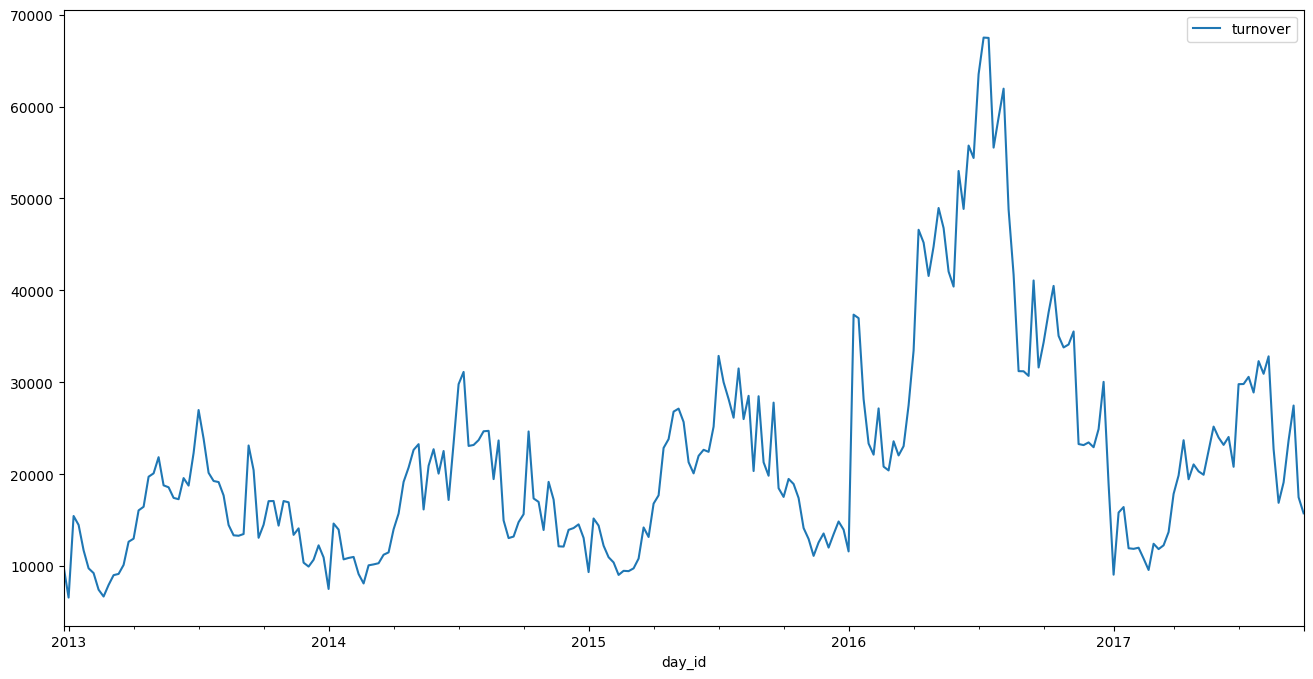

In [14]:
train_df[train_df["dpt_num_department"] == 73].groupby("day_id").agg({"turnover": "sum"}).reset_index().plot(x="day_id", y="turnover", figsize=(16, 8))

We can see that the turnover for this department has a seasonality. We will focus on the 2015 year.

<Axes: xlabel='day_id'>

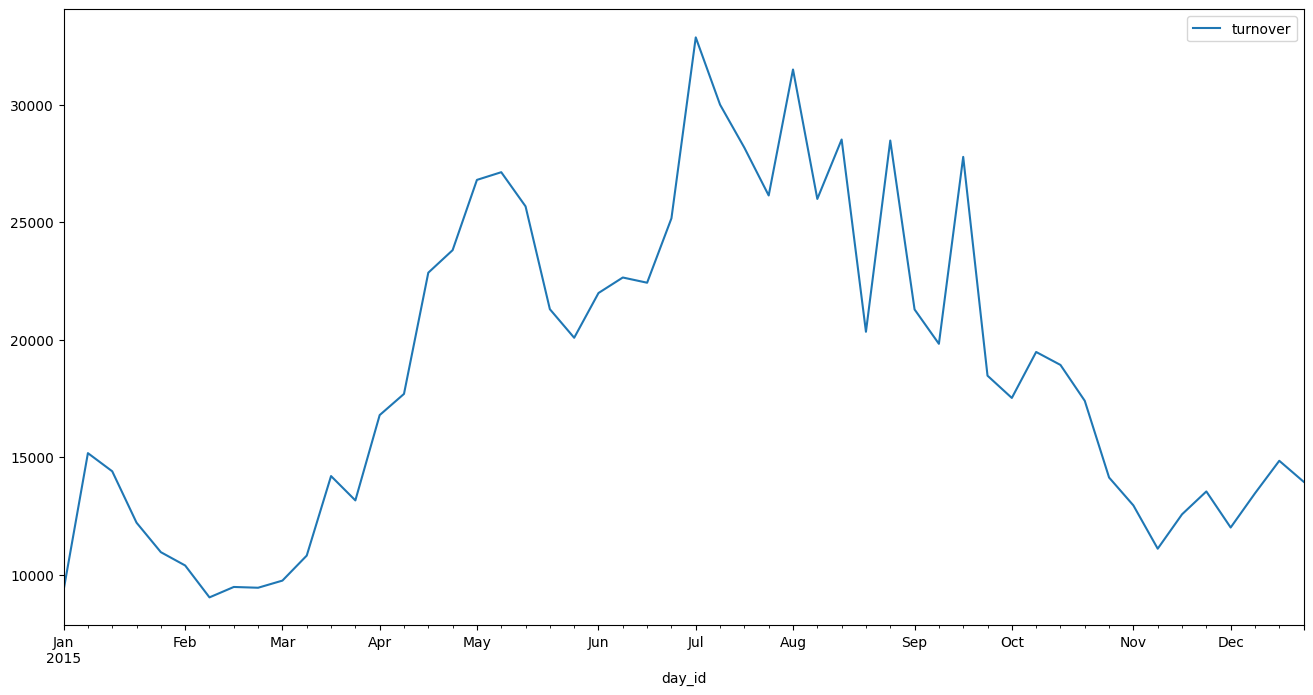

In [15]:
train_df[(train_df["dpt_num_department"] == 73) & (train_df["year"] == 2015)].groupby("day_id").agg({"turnover": "sum"}).reset_index().plot(x="day_id", y="turnover", figsize=(16, 8))

We can observe that there are more sales during Q2 and Q3 of every year. This is related to sports during spring and summer seasons such as **hiking**.

## e. Based on sales can you guess what kind of sport represents department 117?

<Axes: xlabel='day_id'>

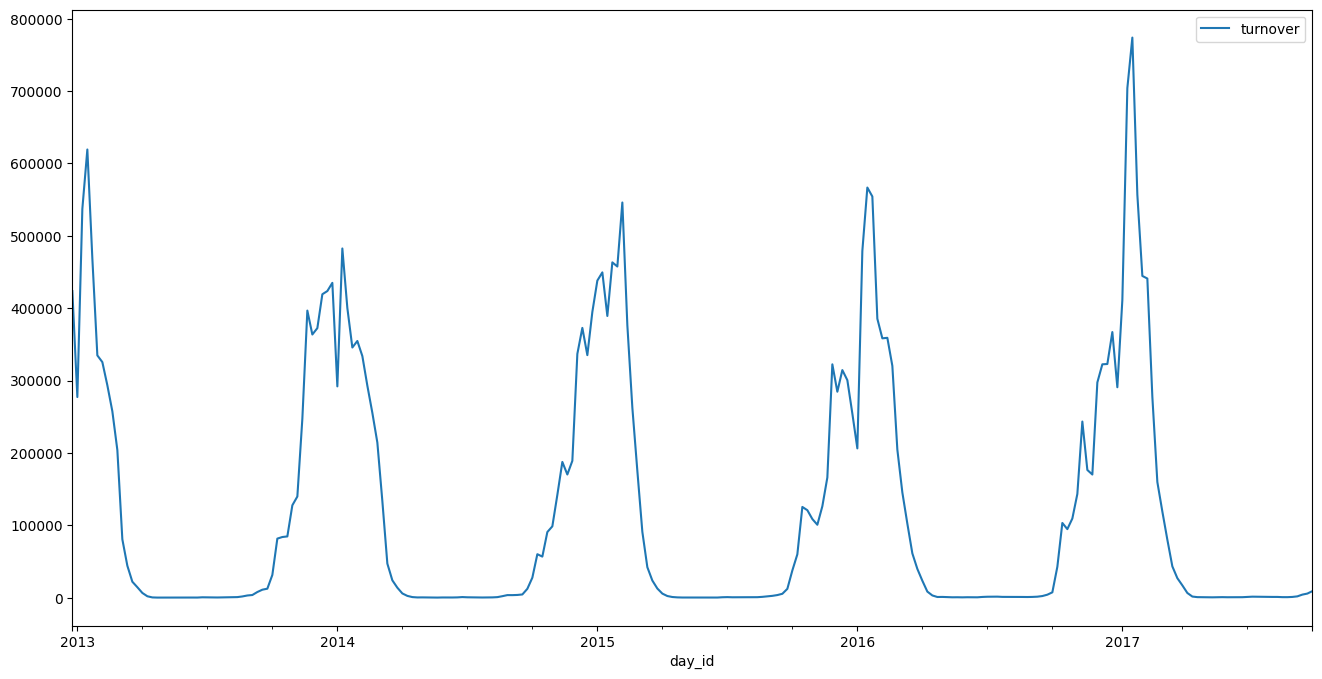

In [16]:
train_df[train_df["dpt_num_department"] == 117].groupby("day_id").agg({"turnover": "sum"}).reset_index().plot(x="day_id", y="turnover", figsize=(16, 8))

Since the turnover for the department 117 is mainly on the quarter Q4 of a given year and the quarter Q1 of the next year, we can make the hypothesis that this represents the winter season related to **skiing**.

## f. What other insights can you draw from the data? Provide plots and figures if needed. (Optional)

<Axes: xlabel='day_id'>

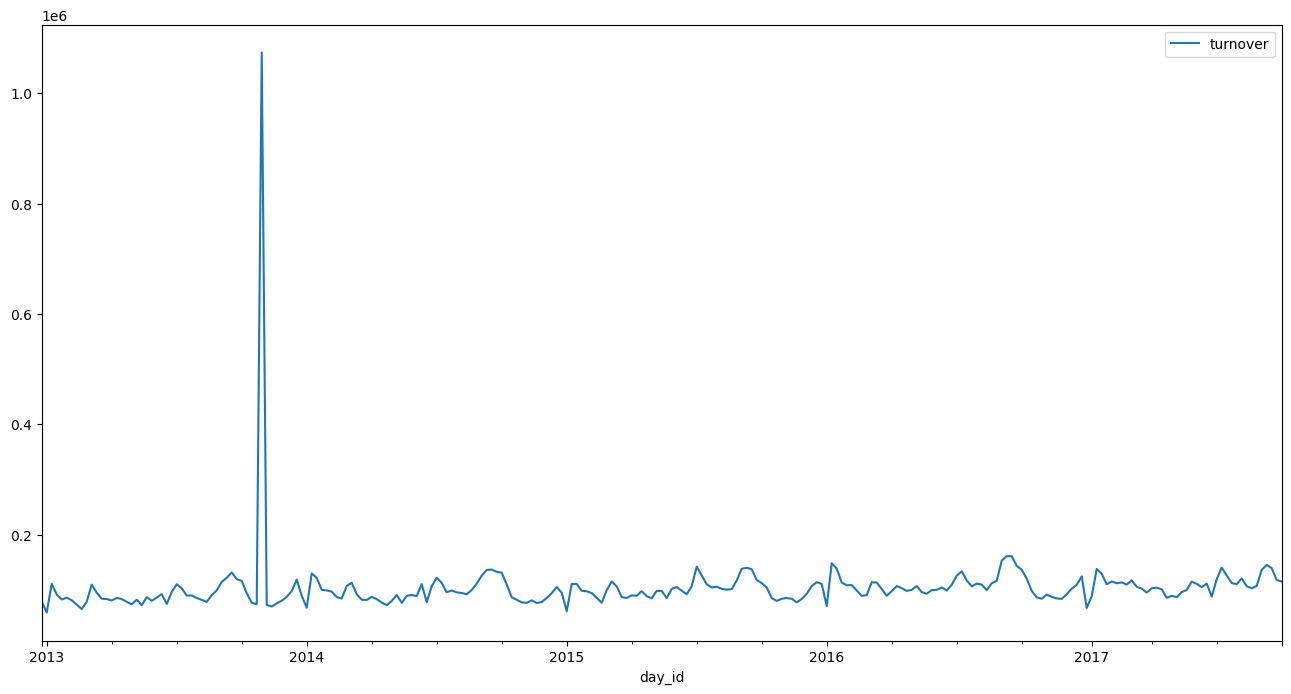

In [17]:
train_df[train_df["dpt_num_department"] == 88].groupby("day_id").agg({"turnover": "sum"}).reset_index().plot(x="day_id", y="turnover", figsize=(16, 8))

There is an **outlier** in year 2013 for the department 88.

<Axes: xlabel='day_id'>

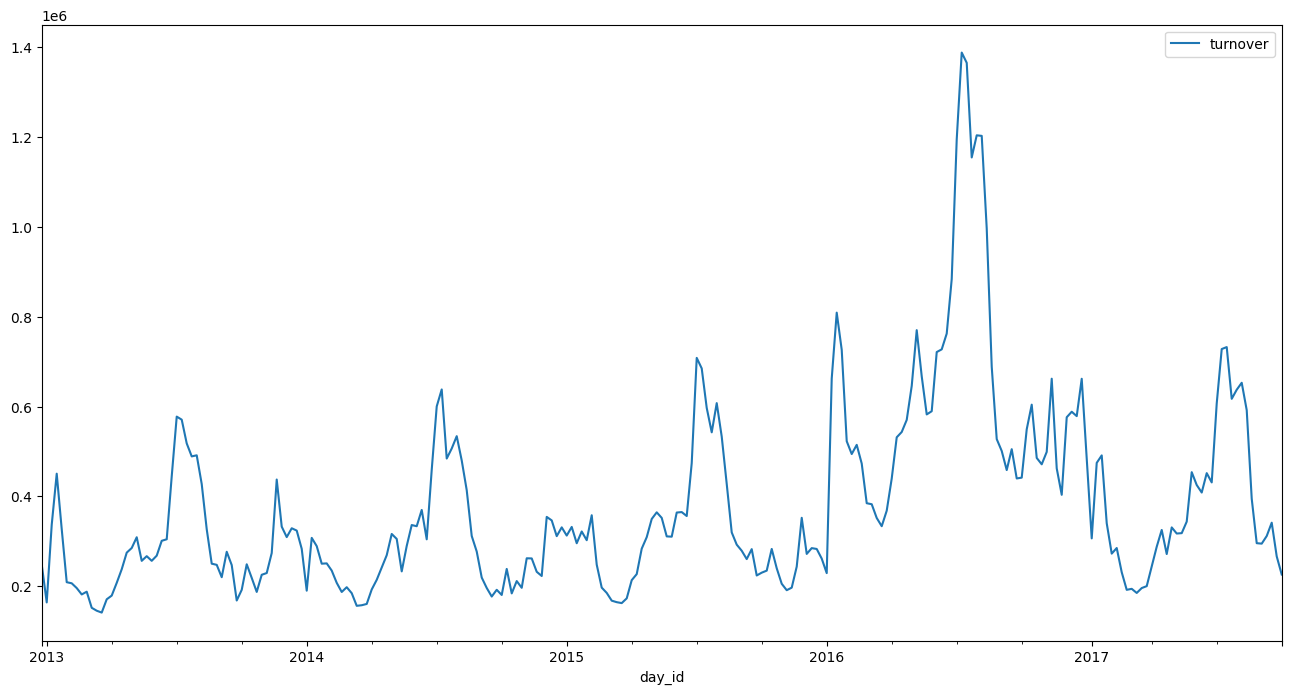

In [18]:
train_df[train_df["dpt_num_department"] == 127].groupby("day_id").agg({"turnover": "sum"}).reset_index().plot(x="day_id", y="turnover", figsize=(16, 8))

We can observe that there is a seasonality for 3 departments: 73, 117 and 127. Only the department 88 does not have a visible seasonality influence.

### Plotting stores according their latitude and longitude

In [19]:
import geopandas
import geodatasets
import folium

In [20]:
full_df = train_df.merge(bu_df, left_on="but_num_business_unit", right_on="but_num_business_unit", how="left")
full_df["dpt_num_department"] = full_df["dpt_num_department"].astype(str)

In [21]:
full_df.head(1)

,day_id,but_num_business_unit,dpt_num_department,turnover,year,nb_week,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,2017-09-30,64,127,580.308443,2017,39,16400,45.625172,0.111939,70,10


In [22]:
but_full_df = full_df[["but_num_business_unit", "dpt_num_department", "but_postcode", "but_latitude", "but_longitude", "but_region_idr_region", "but_region_idr_region"]]
geometry = geopandas.points_from_xy(but_full_df["but_longitude"], but_full_df["but_latitude"])
geo_df = geopandas.GeoDataFrame(
    but_full_df, geometry=geometry
)

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Departments')

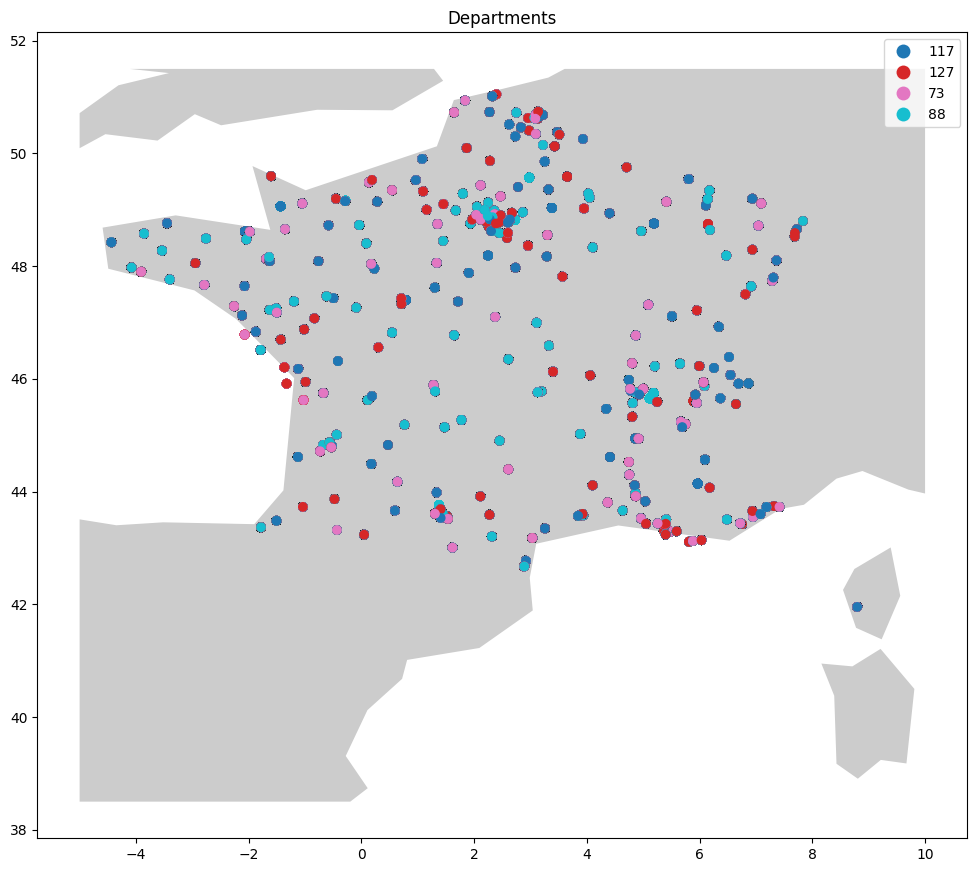

In [23]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(12, 12))
world.clip([-5, 38.5, 10, 51.5]).plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="dpt_num_department", ax=ax, legend=True)
plt.title("Departments")

We can observe the different stores in France. 
Some stores are grouped around big cities such as the stores of the department 127. On the other hand, the stores that belong to the department 88 are spread around all the France.